In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

print("OpenCV version: " + cv2.__version__)
%matplotlib inline

OpenCV version: 4.9.0


In [2]:
from PIL import Image
from urllib.request import urlretrieve
from os import remove

def load_image(url):
    if url.startswith('http'): # if url is a link
        urlretrieve(url, 'temp.jpg') # download the image
        img = cv2.imread('temp.jpg') # read the image
        remove('temp.jpg') # remove the image
        
    else:
        img = cv2.imread(url) # read the image
    return img

img = load_image('https://i.ibb.co/Z6L3q4j/dog1.jpg') # url of the image
img.shape # shape of the image (height, width, channels)

(6306, 4204, 3)

In [3]:
# red intensity of the pixel at (0, 0)
print(img[0, 0, 2])
# green intensity of the pixel at (0, 0)
print(img[0, 0, 1])
# blue intensity of the pixel at (0, 0)
print(img[0, 0, 0])
# OpenCV uses BGR instead of RGB

145
163
183


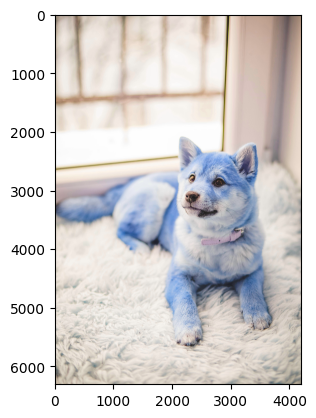

In [4]:
# matplotlib uses RGB, while imshow is a OpenCV function which uses BGR
plt.imshow(img) # display the image

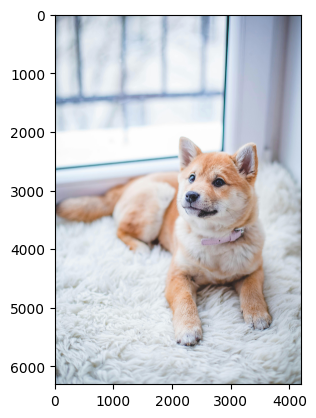

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # display the image

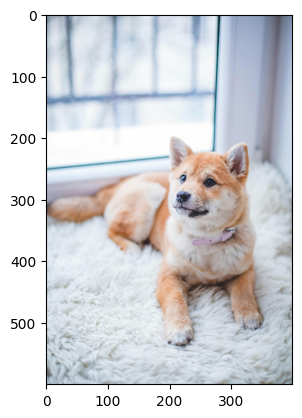

In [6]:
# Resize the image
down_scale_width = 400
down_scale_height = 600
down_scale_tuple = (down_scale_width, down_scale_height)

img_resized = cv2.resize(img, down_scale_tuple, interpolation=cv2.INTER_LINEAR)
# interpolation=cv2.INTER_LINEAR is the default interpolation method, is mathematical method to estimate the pixel values in the resized image
cv2.imshow('Resized Image', img_resized)
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

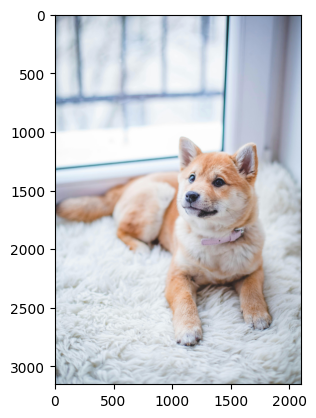

In [7]:
scale = 0.5
width_resized = int(img.shape[1] * scale)
height_resized = int(img.shape[0] * scale)
resized_tuple = (width_resized, height_resized)

img_rescaled = cv2.resize(img, resized_tuple, interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(img_rescaled, cv2.COLOR_BGR2RGB))

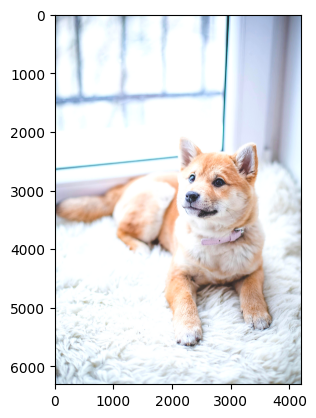

In [8]:
# Brightness control
alpha = 1.15 # Contrast control (1.0-3.0)
beta = 1.5 # Brightness control (0-100)
adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))

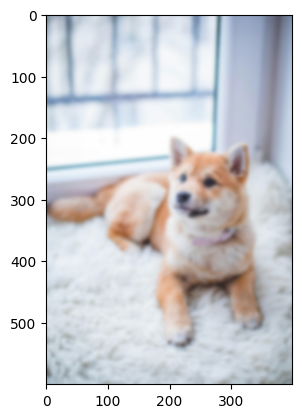

In [9]:
# blur the image
kernel_size = 15
img_blurred = cv2.GaussianBlur(img_resized, (kernel_size, kernel_size), 0) # bigger kernel_size means more blur
plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))

(600, 400)


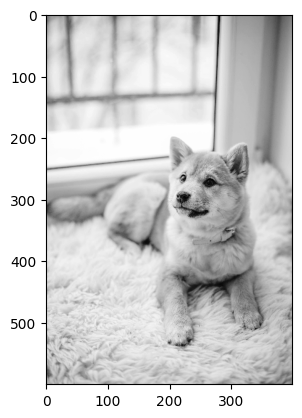

In [10]:
import cv2
# Grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
print(img_gray.shape) # shape of the grayscale image is 600x400 and not 600x400x3 as there is only one channel

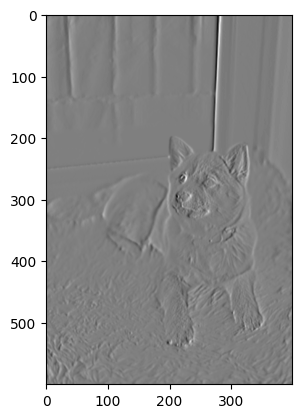

In [11]:
import cv2 as cv
# Edge detection
gx = cv.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5) # horizontal edge detection 
# cv2.CV_64F is the datatype of the output image, contents: img_gray, datatye, dx=1, dy=0, kernel_size=5
gy = cv.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5) # vertical edge detection

plt.imshow(gx, cmap='gray')
plt.show()

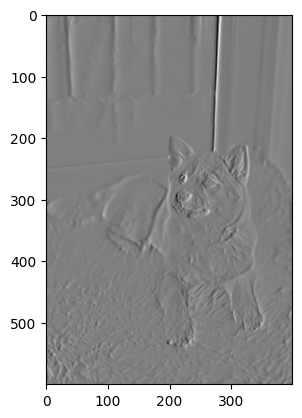

In [12]:
import cv2 as cv
# Edge detection
gx = cv.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=5) # horizontal edge detection 
# cv2.CV_64F is the datatype of the output image, contents: img_gray, datatye, dx=1, dy=0, kernel_size=5
gy = cv.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=5) # vertical edge detection

plt.imshow(gx, cmap='gray')
plt.show()

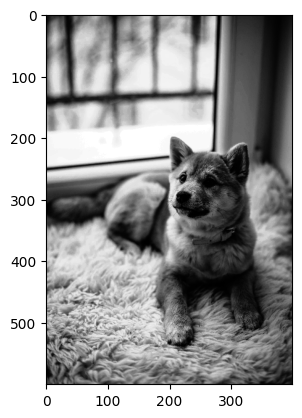

In [13]:
# Histogram equalization
# Histogram of the image is taken and the color intensities are distributed evenly, so that image has more whites and blacks rather than gray
img_gray_eq = cv2.equalizeHist(img_gray)
plt.imshow(img_gray_eq, cmap='gray')
plt.show()
# Histogram equalization is used to enhance the contrast of the image

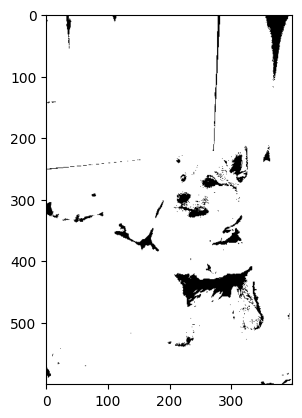

In [14]:
# Binary thresholding
_, binary_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
# All pixels <= 127 = 0; others = 255
# Display the binary image
plt.imshow(binary_img, cmap='gray')
plt.show()

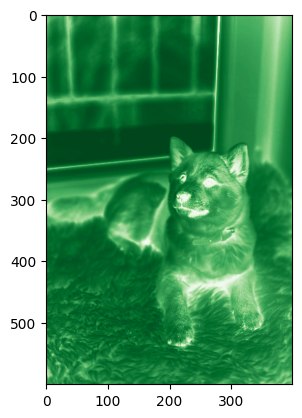

In [15]:
green_img = img_resized[:, :, 1].copy()
plt.imshow( green_img, cmap="Greens")
plt.show()

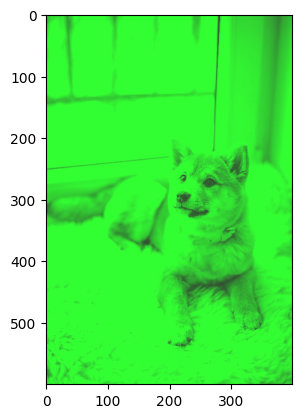

In [16]:
b, g, r = cv2.split(img_resized)
green_img = cv2.merge([b * 0, g, r * 0])
alpha = 1 # Contrast control (1.0-3.0)
beta = 50 # Brightness control (0-100)
adjusted = cv2.convertScaleAbs(green_img, alpha=alpha, beta=beta)
# Display the image with only the green channel
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
%pip install torchinfo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import torch
import torchvision
from torchvision.transforms import functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchinfo import summary
import urllib

In [19]:
# Load the pretrained SSD300 VGG16 model
weights = torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT # default weights
ssd_model = torchvision.models.detection.ssd300_vgg16(box_score_thresh=0.9, weights=True) # load the model
ssd_model.eval() # set the model to evaluation mode
summary(ssd_model) # display the model summary

C:\Users\bsiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Param #
SSD                                      --
├─SSDFeatureExtractorVGG: 1-1            512
│    └─Sequential: 2-1                   --
│    │    └─Conv2d: 3-1                  (1,792)
│    │    └─ReLU: 3-2                    --
│    │    └─Conv2d: 3-3                  (36,928)
│    │    └─ReLU: 3-4                    --
│    │    └─MaxPool2d: 3-5               --
│    │    └─Conv2d: 3-6                  73,856
│    │    └─ReLU: 3-7                    --
│    │    └─Conv2d: 3-8                  147,584
│    │    └─ReLU: 3-9                    --
│    │    └─MaxPool2d: 3-10              --
│    │    └─Conv2d: 3-11                 295,168
│    │    └─ReLU: 3-12                   --
│    │    └─Conv2d: 3-13                 590,080
│    │    └─ReLU: 3-14                   --
│    │    └─Conv2d: 3-15                 590,080
│    │    └─ReLU: 3-16                   --
│    │    └─MaxPool2d: 3-17              --
│    │    └─Conv2d: 3-18           

In [20]:
from urllib.request import urlretrieve
from os import remove

def load_image(url):
    if url.startswith('http'): # if url is a link
        urlretrieve(url, 'temp.jpg') # download the image
        img = Image.open('temp.jpg').convert("RGB") # read the image
        remove('temp.jpg') # remove the image
        
    else:
        img = Image.open(url).convert("RGB") # read the image
    return img

image = load_image('https://i.ibb.co/Z6L3q4j/dog1.jpg') # url of the image

In [21]:
## Preprocess the image
from PIL import Image
from torchvision import transforms
from urllib.request import urlretrieve
import matplotlib.pyplot as plt

# Function to load an image from a URL or local path
def load_image(url):
    filename = 'temp.jpg' if url.startswith('http') else url
    if url.startswith('http'):
        urlretrieve(url, filename)
    img = Image.open(filename).convert("RGB")
    if url.startswith('http'):
        remove(filename)
    return img

# Load the image
image = load_image('https://i.ibb.co/Z6L3q4j/dog1.jpg')

# Define the preprocessing transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Apply the transforms to the image
processed_image = transform(image).unsqueeze(0)  # Add a batch dimension

# Extract only the green channel
processed_image.shape

torch.Size([1, 3, 6306, 4204])

In [22]:
#label encoding. The model outputs a list of class indices and bounding boxes for each detected object.
# The class indices are encoded as integers, and the class labels are stored in the model's class_names attribute.
# The class_names attribute is a list of strings, where the index of each string corresponds to the class index.
id_2_label = {idx: x for idx, x in enumerate(weights.meta['categories'])}

In [23]:
# Run interface, for predictions
with torch.no_grad(): # Disable gradient tracking, as we're in prediction mode
    detections = ssd_model(processed_image)[0]  # Get the detections from the model

dog 0.9901629686355591


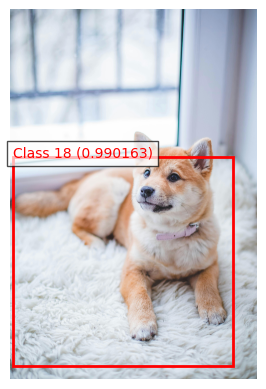

In [24]:
# Display the detections
boxes = detections['boxes']  # The bounding boxes of the objects
labels = detections['labels']  # The predicted labels
scores = detections['scores']  # The confidence scores of the predictions

# Visualize the detections
class_colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']

plt.imshow(image)
for box,label, score in zip(boxes, labels, scores):
    if score > 0.1: # Only display the detection if the confidence score is above 10%
        # So the objects in the image which are identified by the model with a confidence score of more than 10% are displayed
        class_id = label.item() # Get the class index
        class_color = class_colors[class_id % len(class_colors)] # Get the color for this class
        print(id_2_label[label.item()], score.item())
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor=class_color, lw=2))
        plt.text(box[0], box[1], f"Class {label.item()} ({score:2f})", color=class_color, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        
        
plt.axis('off')
plt.show()

In [27]:
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPModel #Library from Hugging Face called transformers
from matplotlib import pyplot as plt
import requests

C:\Users\bsiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # Check if GPU is available
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32") # Load the CLIP model trained on the OpenAI dataset
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32") # Load the pre-processor for the CLIP model
# Better and larger models such as openai/clip-vit-base-patch14 can be used for better results, but they require more computational resources
model.to(device) # Set the model to evaluation mode
print("Model loaded successfully")

Model loaded successfully


C:\Users\bsiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.cocodataset.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


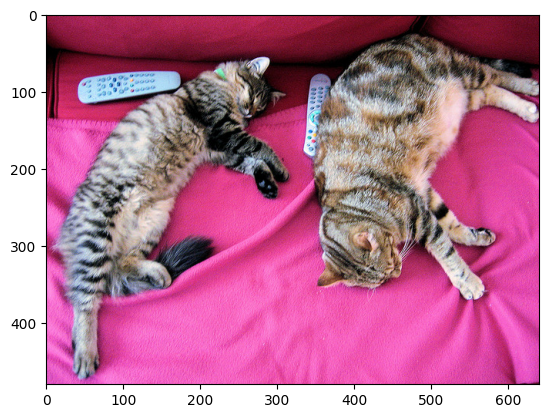

In [32]:
# The image we want to classify
image_url = "https://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True, verify=False).raw) # Load the image from the URL
plt.imshow(image) # Display the image
plt.show()

In [33]:
# Preprocess the image and text using "processor" from CLIP
inputs = processor(text=["a photo of a dog", "a photo of a cat"], images=image, return_tensors="pt", padding=True) 
# texts is a list of strings, images is a PIL image, return_tensors="pt" returns PyTorch tensors,
# texts are probable classes of the image. In this case the image is of a dog or a cat
inputs.to(device) # Set the inputs to the device
with torch.no_grad(): # Disable gradient tracking
    outputs = model(**inputs) # Get the model outputs
logits_per_image = outputs.logits_per_image # The prediction scores for each image-text pair, higher the score, higher the probability
# If the score is higher = image and text are in close relation == image is of the class mentioned in the text
# The logits are the raw scores output by the model, which are then passed through a softmax function to get the probabilities
probs = logits_per_image.softmax(dim=1) # Convert the logits to label probabilities
# softmax function is used to convert the logits to probabilities that sum to 1
for prob, label in zip(probs[0], ["dog", "cat"]): # Display the probabilities for each label
    print(f"{label}: {prob.item() * 100:.2f}%")
    
# Used to things within a image

dog: 0.51%
cat: 99.49%


In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # Check if GPU is available
print("Device:", device)

Device: cpu


In [37]:
import requests

# The endpoint URL
url = "http://localhost:8000/od_predict"

# Example url and context
data = {
    "path_or_url": "https://i.ibb.co/Z6L3q4j/dog1.jpg",
}

# Sending a POST request
response = requests.post(url, json=data)

# Print the response from the server
print("Status Code:", response.status_code)
print("Response:", response.json())